In [2]:
import pandas as pd

data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
print(data.Liked.value_counts())

1    500
0    500
Name: Liked, dtype: int64


In [4]:
!pip install wordcloud


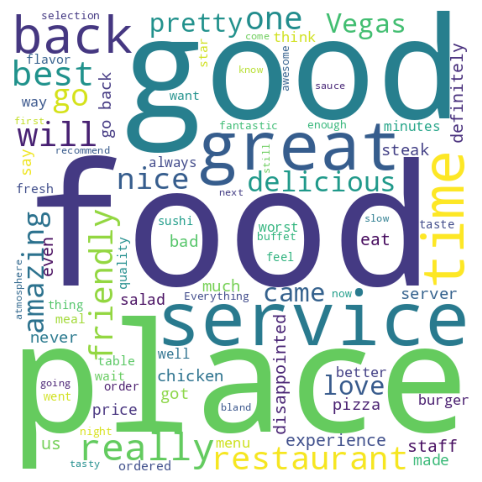

In [5]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 12).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # show plot
    plt.show()

paragraph=' '.join(data.Review.tolist())
word_cloud(paragraph)

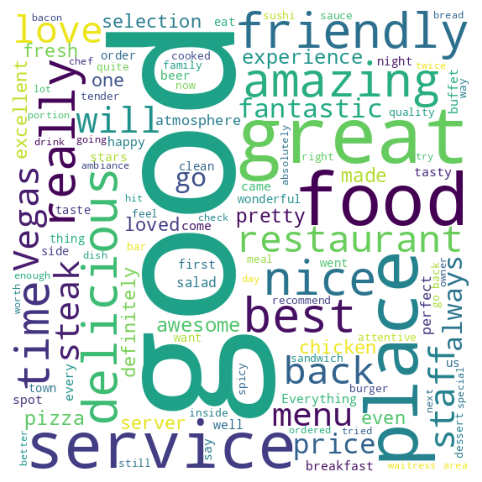

In [6]:
paragraph=' '.join(data[data.Liked==1].Review.tolist())
word_cloud(paragraph)

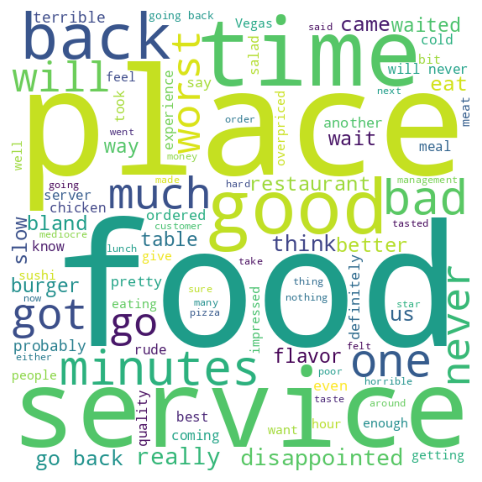

In [7]:
paragraph=' '.join(data[data.Liked==0].Review.tolist())
word_cloud(paragraph)

In [8]:
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Review'])

print(text_counts.shape)

(1000, 1834)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

AttributeError: ignored

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts,
                                                    data['Liked'],
                                                    test_size=0.3,
                                                    random_state=1)

In [11]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7333333333333333


In [13]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)

array([0])